# Project: Investigate a Dataset (No Show case invistagion)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
  * Regarding to the data provided  in a the source in the link below.
  https://www.kaggle.com/joniarroba/noshowappointments

  we can understand that the This dataset collects information from over 100k medical appointments in Brasil . as a person makes a doctor appointment and some of the patient dont show up. 
  - the traget from this data analysis to check which variable from the 14 associated variables can let us  prediect if the patient will show or not.

 
### below description for the 14 variable

  1. ***PatientId*** : unique ID for each patients
  2. ***AppointmentID*** : unique ID for each appointment
  3. ***Gender*** :indicats the patient is Male or Female 
  4. ***ScheduledDay*** : the date that the patient called to set up their appointment
  5. ***AppointmentDay*** : The day of the actuall appointment, when they have to visit the doctor
  6.  ***Age*** : indicats how old is the patient
  7.  ***Neighbourhood*** :indicats the location of the hospital.
  8.  ***Scholarship*** :True of False, indicats if the patient is part of the Brasilian welfare program Bolsa Família. .
  9.  ***Hipertension*** :True or False.
  10. ***Diabetes*** :True or False .
  11. ***Alcoholism*** :True or False .
  12. ***Handcap*** :True or False .
  13. **SMS_received** : True or False indicats if the patient recived SMS message
  14. ***No-show*** : till us if the patient no show or attended the appointment   as no means that the patient.
  



**Qusations to ask:**


1.   what is the rate of the pations who show and who did not show?
2.   what variable that effect on the percentage of the patient who show up in their appointment?



* importing the needed libraries

In [1]:
# Use this cell to set up import statements for all of the packages that you
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Wrangling
<a id='wrangling'></a>
#### **going throw Data wrangling process:**

- Gather
- Assess
- Clean



#### Gathering
 
 - importing the CSV file from the URL 
 - removing unwanted spaces using skipinitialspace methoud


In [2]:

url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv'
df=pd.read_csv(url,skipinitialspace =True)
#%ls
#   plan to use.

####  Assessing
 observations will be added before each codes


 

* checking the shape of the data as we have 110527 rows & 14 columns

In [3]:
# checking the shape of the data
df.shape

(110527, 14)

- checking the data types and colnums names & the number of non-null values
*  PatientI Id should not be float
* AppointmentID should not be int 
* there is wrong format for ScheduledDay  & AppointmentDay
* typo in Handcap  and Hipertension	column name.
* regading to non-null  as they are same as the range index so there is no null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


* using head, tail, sample to checking for abnormal data

In [5]:

#viewing the last 5 columns of the data frame
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
#viewing the last 5 columns of the data frame
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [7]:
#viewing random samples
df.sample(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
105795,5.373540e+13,5772367,M,2016-06-03T15:14:18Z,2016-06-03T00:00:00Z,39,SÃO PEDRO,0,0,0,0,0,0,No
98196,5.817439e+13,5703982,F,2016-05-16T14:50:18Z,2016-06-03T00:00:00Z,3,MARIA ORTIZ,0,0,0,0,0,1,No
70422,8.433572e+12,5749035,F,2016-05-31T07:25:51Z,2016-05-31T00:00:00Z,21,CONSOLAÇÃO,0,0,0,0,0,0,No
78135,8.564356e+14,5682332,F,2016-05-10T16:16:36Z,2016-05-10T00:00:00Z,36,JOANA D´ARC,0,0,0,0,0,0,No
37303,4.365454e+12,5713166,F,2016-05-18T09:48:48Z,2016-05-24T00:00:00Z,0,CRUZAMENTO,0,0,0,0,0,0,No
70202,1.189576e+14,5738392,F,2016-05-25T10:52:59Z,2016-05-25T00:00:00Z,87,CENTRO,0,1,0,0,0,0,No
104709,4.683585e+14,5775399,F,2016-06-06T09:21:38Z,2016-06-08T00:00:00Z,22,SANTOS DUMONT,0,0,0,0,0,0,Yes
81375,6.663936e+12,5593571,F,2016-04-18T09:30:25Z,2016-05-05T00:00:00Z,69,BONFIM,0,1,0,0,0,1,Yes
16129,4.123936e+10,5613161,M,2016-04-25T09:05:05Z,2016-05-10T00:00:00Z,25,PRAIA DO SUÁ,0,0,0,0,0,1,Yes
77271,7.354242e+12,5661050,F,2016-05-05T07:09:58Z,2016-05-05T00:00:00Z,29,BELA VISTA,1,0,0,0,0,0,No


In [8]:
#another way to check NANs counts
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

* we can see fro the descibe below:
 - Age min = -1  (invalid value)
 - Age mean 37
 - Age Max 115

In [9]:
# checking more details about the numbers using describe methoud
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


* by using .deupicated methoud compined with sum methoud its clear that there is duplicated rows

In [10]:
df.duplicated(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']).sum()

0

In [11]:
#Funcation to avoid repeated code
#creating array of needed colums
check_array=np.array([ 'Gender', 'ScheduledDay','AppointmentDay', 'Age', 'Neighbourhood',
            'Scholarship', 'Hipertension','Diabetes', 'Alcoholism', 'Handcap',
            'SMS_received', 'No-show'])
#checking  (value count) by iterating in the arrray of the columns 
def cols_counts():
  for cols in check_array:
    print('*'*40 +cols+'*'*40)
    print(df[cols].value_counts())


* by running the below funcation we found the below:
 - there is single day with 39 appointments while the other das between 3235 & 4692
 - Age value 0 could be valid as the childern age could be between one day and 11 monhs.
 -  we have 81 Neighbourhood there  some  locations are too high and other are too low
 - 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received' bool values 0 and 1
 - 'Handicap' would be considered as bool also as 1,2,3,4 seem indicate that the patient have handicap issue but it vary according to its level


In [12]:
#calling cols_counts() function  to check value counts for all the columns
cols_counts()

****************************************Gender****************************************
F    71840
M    38687
Name: Gender, dtype: int64
****************************************ScheduledDay****************************************
2016-05-06T07:09:54Z    24
2016-05-06T07:09:53Z    23
2016-04-25T17:17:46Z    22
2016-04-25T17:18:27Z    22
2016-04-25T17:17:23Z    19
                        ..
2016-05-06T07:10:39Z     1
2016-05-19T12:38:21Z     1
2016-06-01T07:57:55Z     1
2016-05-13T08:39:16Z     1
2016-05-25T10:45:18Z     1
Name: ScheduledDay, Length: 103549, dtype: int64
****************************************AppointmentDay****************************************
2016-06-06T00:00:00Z    4692
2016-05-16T00:00:00Z    4613
2016-05-09T00:00:00Z    4520
2016-05-30T00:00:00Z    4514
2016-06-08T00:00:00Z    4479
2016-05-11T00:00:00Z    4474
2016-06-01T00:00:00Z    4464
2016-06-07T00:00:00Z    4416
2016-05-12T00:00:00Z    4394
2016-05-02T00:00:00Z    4376
2016-05-18T00:00:00Z    4373
2016-05-17T


### **cleaing**



   

- Rename Handcap to Handicap
- Hipertension to Hypertension  as it was writen in spanish

In [13]:
#correcting typo the Handcap  colunm to Handicap
df.rename(columns = {'Handcap':'Handicap','Hipertension':'Hypertension'}, inplace = True)

- remove age have with value -1

In [14]:
#removing -1 value from the age column
df=df[df['Age'] >= 0]


- PatientId & AppointmentID need to be changed to object type.

In [15]:
# fixing the data types
df.loc[:, 'PatientId']=df.loc[:, 'PatientId'].astype('str')
df.loc[:, 'AppointmentID']=df.loc[:, 'AppointmentID'].astype('str')


- ScheduledDay & AppointmentDay type change to  datetime type 

In [16]:
df.loc[:, 'AppointmentDate']= pd.to_datetime(df.loc[:, 'AppointmentDay'])
df.loc[:, 'ScheduledDate'] = pd.to_datetime(df.loc[:, 'ScheduledDay'])


In [17]:
df.loc[:, 'ScheduledDate'] = pd.to_datetime(df.loc[:, 'ScheduledDate']).dt.date
df.loc[:, 'ScheduledDate'] = pd.to_datetime(df.loc[:, 'ScheduledDate'])


- extracting the day of the week and the month name as it could be used for analysis purpose


In [18]:
# adding  day column for the appointment
df.loc[:,'AppointmentDay'] = df.loc[:,'AppointmentDate'].dt.day_name()


- removing  Time zone stamp for better view in the graphs

In [19]:
# creating function to make some cleaning the dates columns
def strip_date(dt):
  '''the funcation is to replace  timezone info with none
  it dose not take any inputs use it with apply methoud to remove  '''
  return dt.replace(tzinfo=None)

#removing the time for colums below
df.loc[:,'ScheduledDate'] = df.loc[:, 'ScheduledDate'].apply(strip_date)

df.loc[:,'AppointmentDate'] =df.loc[:,'AppointmentDate'].apply(strip_date)


- calculate the days diffrent between AppointmentDate & ScheduledDate as it could be used for analysis purpose


In [20]:
# creating new column with the days differnce between the schaduled date & the appointment date
df.loc[:,'days_diff']= (df.loc[:, 'AppointmentDate']-df.loc[:, 'ScheduledDate']).dt.days


- creating new column for no show as boolean to  be able to make aggrations analysis


In [21]:
# creating new col for no show as boolean
df['No-show_count']= np.where(df.loc[:,'No-show']=='Yes', 1, 0)



* change all values higher than 1  in hadicap to be =1 as any value more than 1 is also hadicap.

In [22]:
df['Handicap']= np.where(df.loc[:,'Handicap']>=1, 1, 0)


- giving the values in No-show and Gender meaningful names.

In [23]:
df['No-show']= np.where(df.loc[:,'No-show']=='Yes', "No show", 'Show')
df['Gender']= np.where(df.loc[:,'Gender']=='F','Female','Male')

* Rename no show to be Status

In [24]:
df.rename(columns={'No-show':'status'},inplace=True)

- removing 'ScheduledDay' column  as it was replaced with meaningful name 'ScheduledDate'

In [25]:
# dropping unused colunm
df=df.drop(['ScheduledDay'],axis = 1)

- checking the unique values for the new column created

In [26]:
df['days_diff'].unique()

array([  0,   2,   3,   1,   4,   9,  29,  10,  23,  11,  18,  17,  14,
        28,  24,  21,  15,  16,  22,  43,  30,  31,  42,  32,  56,  45,
        46,  39,  37,  38,  44,  50,  60,  52,  53,  65,  67,  91,  66,
        84,  78,  87, 115, 109,  63,  70,  72,  57,  58,  51,  59,  41,
        49,  73,  64,  20,  33,  34,   6,  35,  36,  12,  13,  40,  47,
         8,   5,   7,  25,  26,  48,  27,  19,  61,  55,  62, 176,  54,
        77,  69,  83,  76,  89,  81, 103,  79,  68,  75,  85, 112,  -1,
        80,  86,  98,  94, 142, 155, 162, 169, 104, 133, 125,  96,  88,
        90, 151, 126, 127, 111, 119,  74,  71,  82, 108, 110, 102, 122,
       101, 105,  92,  97,  93, 107,  95,  -6, 139, 132, 179, 117, 146,
       123], dtype=int64)

-  in the colunm days_diff  , removing  values less than 0 which considered as invalid values as its no logic to set the appointment date before the reservation date so the values will be dropped

In [27]:
# removing the values less than 0.
df=df[df['days_diff'] > -1]

-  qiuck look to the columns and the data after the above modifactions

In [28]:
df.head()

,PatientId,AppointmentID,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,status,AppointmentDate,ScheduledDate,days_diff,No-show_count
0,29872499824296.0,5642903,Female,Friday,62,JARDIM DA PENHA,0,1,0,0,0,0,Show,2016-04-29,2016-04-29,0,0
1,558997776694438.0,5642503,Male,Friday,56,JARDIM DA PENHA,0,0,0,0,0,0,Show,2016-04-29,2016-04-29,0,0
2,4262962299951.0,5642549,Female,Friday,62,MATA DA PRAIA,0,0,0,0,0,0,Show,2016-04-29,2016-04-29,0,0
3,867951213174.0,5642828,Female,Friday,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Show,2016-04-29,2016-04-29,0,0
4,8841186448183.0,5642494,Female,Friday,56,JARDIM DA PENHA,0,1,1,0,0,0,Show,2016-04-29,2016-04-29,0,0


- creating creating 2 data frames one for show and other for no show

In [29]:
#creating data frame for show and no show 
df_show=df[df['status'] == 'Show']
df_noshow=df[df['status'] == 'No show']



- Creating functions to be used to create the needed data frames

-  merges function to create data frame from (df_show & df_noshow) data frame

In [30]:
#creating function to merge 
def merges(table1,table2,col1):
  '''creating function to merge dataframes  by column name & show and no show
  table1 first data frame
  table2 2nd data frame
  col1 is the column  to be merged on it as its should be merged on col1'''
  table1.rename(columns={'No-show_count':'Show'},inplace = True)
  new=pd.merge(table1,table2,on=col1,how='outer')
  # replace null values with 0
  new.fillna(0,inplace=True)
  #sort by the show
  new.sort_values('Show',ascending=False,inplace=True)
  return new


- pivo() funcation to create pivot table  for gruop data frame

In [31]:
#Creating pivot
def pivo(col1):
  ''' funcation to gruopby then pivot  the  show  & no show  with  any choosen column 
  Parameters:
  col1 : the colum we need to choose from the data frame.
  output: create pivot'''
  df_count =df.groupby([col1,'status'],as_index=False)['No-show_count'].count()
  pivo1=pd.pivot_table(df_count ,index =col1,aggfunc='sum',values='No-show_count',columns='status')
  return pivo1

- creating function to make filters   gruoped by show or no show

In [32]:
#creating filter

def filter1(col1,table):
  ''' funcation to filter the show and no show  status with  any choosen column 
  Parameters:
  col1 : the colum we need to choose from the data frame.
  table:  the data frame name.
  output: filter  the table  with  col1    ''' 

  df_count =table.groupby([col1,'status'],as_index=False)['No-show_count'].count()
 
  filter=df_count 
  return filter
  

- create function to calculate the count and the percenatge for a column

In [33]:
def count_percentage(col1):
  ''' funcation to create new dataframe with the show the count & percentage for spasifc colunm
  col1 : the colum we need to choose from the data frame.
  output: the count and the percenatge for the needed column
  output: new dataframe with the count and percentage '''
  # create groupby for the parameter
  counts= df.groupby(col1,as_index=True).size().reset_index(name='count')
  #sort
  counts.sort_values(['count'],inplace=True,ascending=True)
  # create Serie with the percentage
  percent =df[col1].value_counts(normalize=True,ascending=True)
  # changing the format to %
  percent =percent.mul(100).round(1).astype(str)+'%'
  #convert the serie to dataframe
  percent=pd.DataFrame(percent)
  #adding  the percentage column to counts dataframe
  counts['percent%']=percent[col1].values
  return counts


- create function to calculate percenatge  of (no show) for the  the variable

In [34]:
#create function to calculate no show persenatge
def nopercentage(table):
  ''' create column in the data frame  with the perstangate
  table is the name of the data frame'''

  table['percent'] =table['No show']/(table['No show']+table['Show'])
  
  return table


<a id='eda'></a>
## Exploratory Data Analysis


### what is the rate of the pations who show and who did not show?)

**the answer for the first Qustaion**: what is the rate of the pations who show and who did not show?

- we found that 79.8% of the patient show up and 20.2% did not show up the below graph & table show up as we will need to analyse in details for check the reason of the no show cases

,status,count,percent%
0,No show,22314,20.2%
1,Show,88207,79.8%


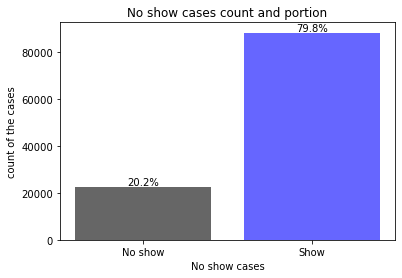

In [35]:
#checkng noshow portion
noshow= count_percentage('status')
#creating container
fig1, ax1 = plt.subplots()
#giving the columns names to the axis
m_x= noshow.iloc[:,0]
m_y= noshow.iloc[:,1]
m_z= noshow.iloc[:,2]
ax1.bar(m_x,m_y,color=['k','b'],alpha=0.6)
#adding the lables
ax1.set_ylabel('count of the cases')
ax1.set_xlabel('No show cases')
#addting the title
plt.title('No show cases count and portion')
# adding the percenatge 
plt.text(1,m_y[1],m_z[1],ha='center',va='bottom')
plt.text(0,m_y[0],m_z[0],ha='center',va='bottom')
#givig proper name to the ticks
#plt.xticks([0,1],('No Show', 'Attend'))



noshow

###  what variable that effect on the percentage of the patient who show up in their appointment?

**the answer 2 lead to sub qusations:**


**done the Gender impact the no show rate**
- how gender can effect in no show ratio?
 - 65% of the patient are Females and 35% Male  
 -   we can see that female patient numbers is 2 times male patient numbers.
 - females no show about 20% of the female appointments
 - males no show about 20% of the male appointments
 
**answer**
 - gender type has no effect on no show ratio. 
 

In [36]:
gender= count_percentage('Gender')
gender

,Gender,count,percent%
1,Male,38685,35.0%
0,Female,71836,65.0%


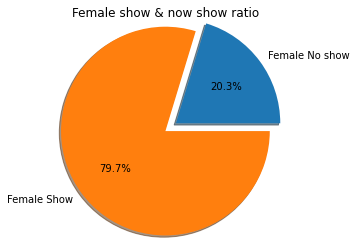

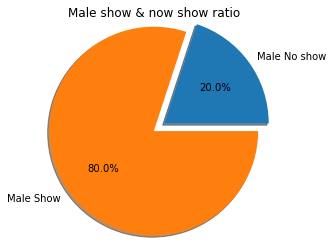

In [37]:
#creating data frame for the (gender , male & female).
gender = pivo('Gender')
female =gender.query('Gender=="Female"')
male =gender.query('Gender=="Male"')

# pie chart for females
female = female.stack()
fig, ax = plt.subplots()
plt.title('Female show & now show ratio')
ax.pie(female, labels=["{0} {1}".format(l1, l2) for l1, l2 in female.index], autopct='%1.1f%%',radius=1.2,shadow=True,explode=[0.15,0]);

# pie chart for males
male = male.stack()
fig, ax1 = plt.subplots()
plt.title('Male show & now show ratio')
ax1.pie(male, labels=["{0} {1}".format(l1, l2) for l1, l2 in male.index], autopct='%1.1f%%',radius=1.2,shadow=True,explode=[0.15,0]);




**dose the Appointment date impact the no show rate?**

**answer**
- there is no connection between the appointment date  as show and no show have same trind line.
- we can notice that  Staurday 14/5/2016 has only 39 appointmets but the reasone is not clear.


In [38]:
#Creating the the appointment date table 
date_show= filter1('AppointmentDate',df_show)
date_noshow =filter1('AppointmentDate',df_noshow)
date=merges(date_show,date_noshow,'AppointmentDate')
date.sort_values('AppointmentDate',inplace=True)


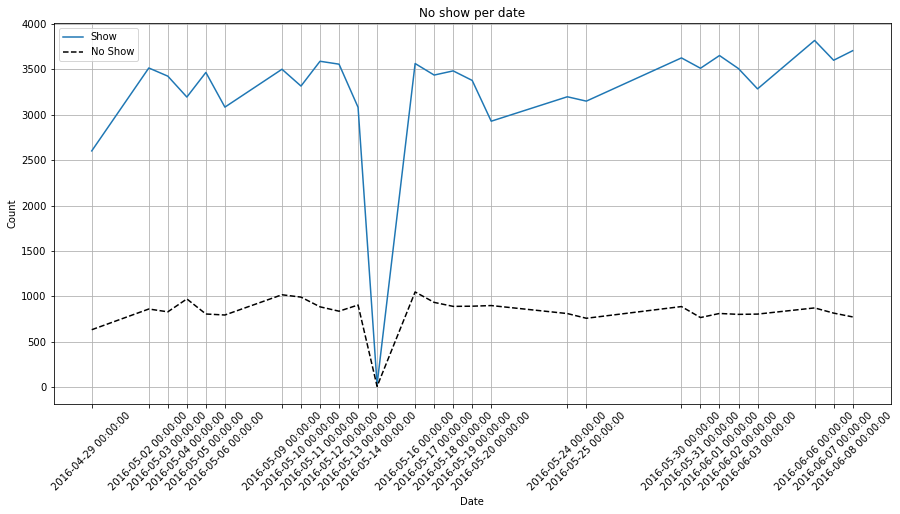

In [66]:
values=date['AppointmentDate']
#creating line chart
plt.figure(figsize=(15,7))
#values=date['AppointmentDate']
plt.title('No show per date')
plt.plot(date['AppointmentDate'],date['Show'])
plt.plot(date['AppointmentDate'],date['No-show_count'],'k--')
#lables
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(date['AppointmentDate'],values,rotation='45')
plt.grid(True)
#enable legend
plt.legend(['Show','No Show'],);


**dose the days difference impact the no show rate**

- days difference are number of the days between schedule and appointment day
- we notice that 34.9% for the appointments reserved in the same day & 95% of the patient show up in the same day.
- most of the appoinments has been reserved within 1 weeks from the appoinment day

**Answer**
- appoitment in the same day has higher rate for showing up.


In [40]:
#calling function the show the count and percentage from the total.
days_diff= count_percentage('days_diff')
# the count_percentage() sort asending sho we check the tail for the highest %
days_diff.tail(3)

,days_diff,count,percent%
4,4,5290,4.8%
2,2,6725,6.1%
0,0,38562,34.9%


In [41]:
#calling pivo() to create pivot for days different
days_percent=pivo('days_diff')
# create new colunm  to calculate the % of show appoints for each single day

days_percent['show_percent'] =days_percent['Show']/(days_percent['No show']+days_percent['Show'])
days_percent['show_percent'] =days_percent['show_percent'] .mul(100).round(1).astype(str)+'%'
days_percent.head(3)

status,No show,Show,show_percent
days_diff,,,
0,1792.0,36770.0,95.4%
1,1113.0,4100.0,78.6%
2,1602.0,5123.0,76.2%


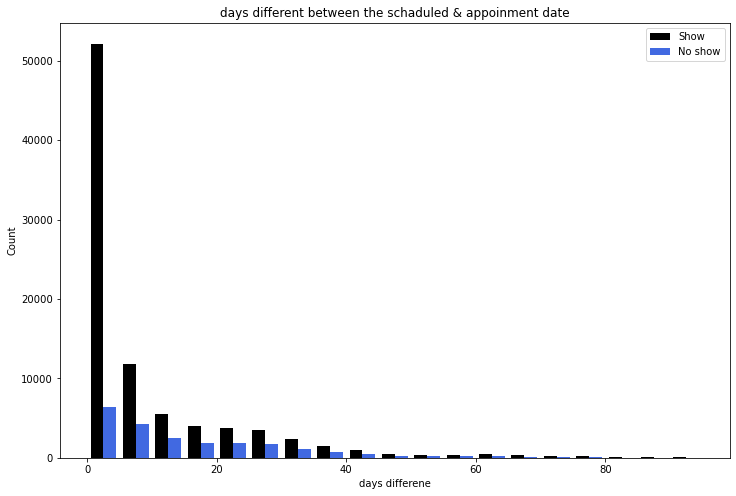

In [42]:
# create hist plot for days diffenece
fig = plt.figure(figsize = (12,8))
plt.xlabel('days differene');
plt.ylabel('Count');
plt.title('days different between the schaduled & appoinment date');

plt.hist([df_show.days_diff,df_noshow.days_diff], bins=range(0,100,5),color=['k','royalblue'])

plt.legend(['Show','No show']);



In [43]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hypertension', 'Diabetes',
       'Alcoholism', 'Handicap', 'SMS_received', 'status', 'AppointmentDate',
       'ScheduledDate', 'days_diff', 'No-show_count'],
      dtype='object')

**dose the patiants attribute impact the no show rate?**

   - patient attrubits like('Scholarship', 'Hypertension', 'Diabetes','Alcoholism', 'Handicap', 'SMS_received')

**answer**
-checking the patiants attriute the answer is no impcat on no show rate as below:

**Scholarship**
  - less than 10% from the total has Scholarship
  -the presentage of no show patients with Scholarship 23.7% from the total Scholarship patients no show
  -  the no show persentage of Scholarship we cannot be sure if it has effect on the appoinments no show


In [44]:
# percentage from total
count_percentage('Scholarship')

,Scholarship,count,percent%
1,1,10861,9.8%
0,0,99660,90.2%


In [45]:

# no show filter with %
Scholarship_noshow= pivo('Scholarship')
Scholarship_noshow= nopercentage(Scholarship_noshow)
Scholarship_noshow['percent'] =Scholarship_noshow['percent'].mul(100).round(1).astype(str)+'%'
Scholarship_noshow

status,No show,Show,percent
Scholarship,,,
0,19736,79924,19.8%
1,2578,8283,23.7%


**Hypertension**
  - 19.7%  suffer Hypertension from the total  patients
  -the presentage of no show patients with suffering from Hypertension  17.3% from the total Hypertension no show
  -  the no show persentage with Hypertension we indcate there is no effect on the appoinments no show


In [46]:
# percentage from total

count_percentage('Hypertension')

,Hypertension,count,percent%
1,1,21801,19.7%
0,0,88720,80.3%


In [47]:

# no show filter with %
Hypertension_noshow= pivo('Hypertension')
Hypertension_noshow= nopercentage(Hypertension_noshow)
Hypertension_noshow['percent'] =Hypertension_noshow['percent'].mul(100).round(1).astype(str)+'%'
Hypertension_noshow

status,No show,Show,percent
Hypertension,,,
0,18542,70178,20.9%
1,3772,18029,17.3%


**Diabetes**
  - 7.2%  suffer Diabetes from the total patients
  -the presentage of no show patients with suffering from Diabetes  18% from the total Diabetes no show
  -  the no show persentage with Diabetes we indcate there is no effect on the appoinments no show


In [48]:
# percentage from total

count_percentage('Diabetes')

,Diabetes,count,percent%
1,1,7943,7.2%
0,0,102578,92.8%


In [49]:

# no show filter with %
Diabetes_noshow= pivo('Diabetes')
Diabetes_noshow= nopercentage(Diabetes_noshow)
Diabetes_noshow['percent'] =Diabetes_noshow['percent'].mul(100).round(1).astype(str)+'%'
Diabetes_noshow

status,No show,Show,percent
Diabetes,,,
0,20884,81694,20.4%
1,1430,6513,18.0%


**Alcoholism**
  - 3%  suffer Alcoholism from the total patients
  -the presentage of no show patients with suffering from Alcoholism  20,1% from the total Alcoholism patients
  -  the no show persentage with Alcoholisms we indcate there is no effect on the appoinments no show


In [50]:
# percentage from total
count_percentage('Alcoholism')

,Alcoholism,count,percent%
1,1,3360,3.0%
0,0,107161,97.0%


In [51]:
# no show filter with %
Alcoholism_noshow= pivo('Alcoholism')
Alcoholism_noshow= nopercentage(Alcoholism_noshow)
Alcoholism_noshow['percent'] =Alcoholism_noshow['percent'].mul(100).round(1).astype(str)+'%'
Alcoholism_noshow

status,No show,Show,percent
Alcoholism,,,
0,21637,85524,20.2%
1,677,2683,20.1%


**Handicap**
  - 2%  suffer Handicap from the total patients
  -the presentage of no show patients with suffering from Handicap  18.1% from the total Handicap no show
  -  the no show persentage with Handicap we indcate there is no effect on the appoinments no show


In [52]:
# percentage from total

count_percentage('Handicap')

,Handicap,count,percent%
1,1,2239,2.0%
0,0,108282,98.0%


In [53]:

# no show filter with %
Handicap_noshow= pivo('Handicap')
Handicap_noshow= nopercentage(Handicap_noshow)
Handicap_noshow['percent'] =Handicap_noshow['percent'].mul(100).round(1).astype(str)+'%'
Handicap_noshow

status,No show,Show,percent
Handicap,,,
0,21909,86373,20.2%
1,405,1834,18.1%


**patients recive SMS**

  - patients receive sms 32% from the total patients which about half the patients who recived SMS
  -the presentage of no show patients that recived sms  27.6% which is towice the no show of the Patients who did not recive sms
  -  the no show persentage of recive SMS is not normal as it should reduce the no show not increase


In [54]:
# percentage from total

count_percentage('SMS_received')

,SMS_received,count,percent%
1,1,35482,32.1%
0,0,75039,67.9%


In [55]:
# no show filter with %
SMS_received_noshow= pivo('SMS_received')
SMS_received_noshow= nopercentage(SMS_received_noshow)
SMS_received_noshow['percent'] =SMS_received_noshow['percent'].mul(100).round(1).astype(str)+'%'
SMS_received_noshow

status,No show,Show,percent
SMS_received,,,
0,12530,62509,16.7%
1,9784,25698,27.6%


**dose the AppointmentDay impact the no show rate?**

- looking at the below indcate that Tus & wed days are the most reservation days
- its unclear what happens on Sat. it was date 14/5/2016
- its also clear that the clinic dont reserve appointments useualy on Saturdays

**answer**
- the persenatge of no show during the day of the week does not indicat of it effect on the no show

In [56]:
dayweek= pivo('AppointmentDay')
dayweek

status,No show,Show
AppointmentDay,,
Friday,4037,14982
Monday,4689,18024
Saturday,9,30
Thursday,3337,13909
Tuesday,5150,20488
Wednesday,5092,20774


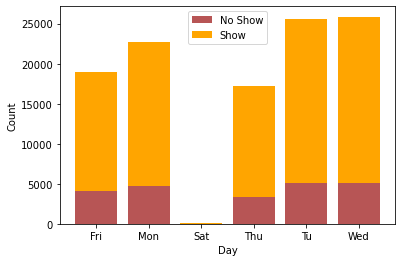

In [57]:
days = ['Fri', 'Mon', 'Sat', 'Thu','Tu','Wed']
noshow = dayweek['No show']
show = dayweek['Show']

plt.xlabel('Day')
plt.ylabel('Count')

# plot bars in stack manner
plt.bar(days, noshow, color='brown',alpha=0.8)
plt.bar(days, show, bottom=noshow, color='orange')

plt.legend(['No Show','Show']);



**dose the age impact the no show rate?**
- we can notice that age from 1 day till 23 months have hights percentage 5.3% of the total pacents
- by looking at the top 10 ages of the no show ,will find there is no spasfic age that can indiccate if the patient will attend or not
- from the graph we can notice that the no show numbers starts to drop slowly starting from age 55 and higher, we we cannot say for sure that this  slow drop related to the age
-also age from 13 to 15 show rate dropped less than 10k

**answer**
- the age have low impact in no show rate


In [58]:
#top 5 patient appointments per Age
count_percentage('Age').tail(5)

,Age,count,percent%
53,53,1651,1.5%
49,49,1652,1.5%
52,52,1746,1.6%
1,1,2273,2.1%
0,0,3539,3.2%


In [59]:
#checking top 10 no show persenatge  per Age
Age_noshow= pivo('Age')
Age_noshow= nopercentage(Age_noshow)
Age_noshow.fillna(0,inplace=True)
#Age_noshow['percent'] =Age_noshow['percent'].mul(100).round(1).astype(str)+'%'
Age_noshow.sort_values(['percent'],ascending=False).head(10)


status,No show,Show,percent
Age,,,
115,3.0,2.0,0.600000
14,316.0,802.0,0.282648
13,303.0,800.0,0.274705
15,322.0,889.0,0.265896
9,364.0,1008.0,0.265306
25,352.0,980.0,0.264264
17,396.0,1113.0,0.262425
24,321.0,921.0,0.258454
22,350.0,1025.0,0.254545


In [60]:
#Creating the the appointment date table 
age_show =filter1('Age',df_show)
age_noshow =filter1('Age',df_noshow)
age=merges(age_show,age_noshow,'Age')
age.sort_values('Age',inplace=True)


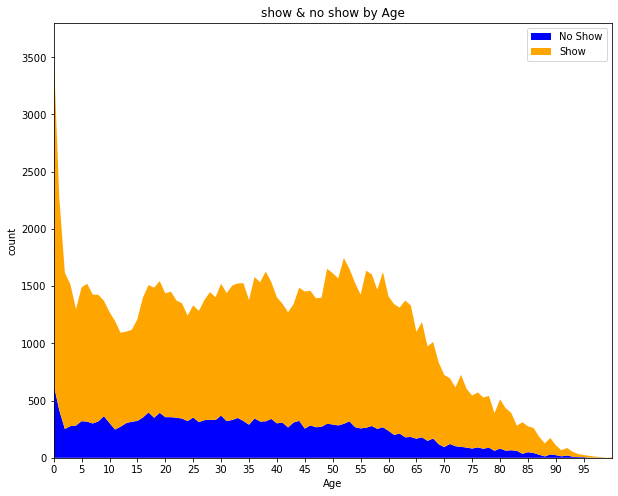

In [61]:

fig = plt.figure(figsize = (10,8))
plt.stackplot( age['Age'],age['No-show_count'], age['Show'],
              colors =['b', 'orange'])
plt.title('show & no show by Age')
plt.ylabel('count')
plt.xlabel('Age')
plt.ylim((0,3800))
plt.xlim((0,100))
plt.legend(['No Show','Show'])
plt.xticks(range(0,100,5));

**dose the Neighbourhood impact the no show rate?**
- we can see that the nummber of the appointments for each area 
 -  top 5 areas as below 
    1. JARDIM CAMBURI   with 7717 appointments
    2. MARIA ORTIZ      with 5805 appointments  
    3. RESISTÊNCIA      with 4430 appointments        
    4. JARDIM DA PENHA  with 3877 appointments           
    5. ITARARÉ         with  3514 appointments   

 -  lowest 5 areas as below 
     1. ILHA DO BOI      with 35 appointments
     2. ILHA DO FRADE      with 10 appointments  
     3. ILHAS OCEÂNICAS DE TRINDADE  with 8 appointments        
     4. PARQUE INDUSTRIAL   with 2 appointments           
     5. PARQUE INDUSTRIAL  1  appointments    
- and this is huge gap betten the areas thugh it seem that the Neighbourhood dont have impact on the no show rate

**answer**
    - no clear impact of the area on the no show

 


In [62]:
df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4430
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [63]:
# ceating filter show and no show for the Neighbourhood
Neighbourhood_show= filter1('Neighbourhood',df_show)
Neighbourhood_noshow =filter1('Neighbourhood',df_noshow)
Neighbourhood=merges(Neighbourhood_show,Neighbourhood_noshow,'Neighbourhood')
Neighbourhood.sort_values('Show',ascending=True, inplace=True)



In [64]:
Neighbourhood.tail(3)

,Neighbourhood,status_x,Show,status_y,No-show_count
58,RESISTÊNCIA,Show,3525.0,No show,905.0
42,MARIA ORTIZ,Show,4586.0,No show,1219.0
37,JARDIM CAMBURI,Show,6252.0,No show,1465.0


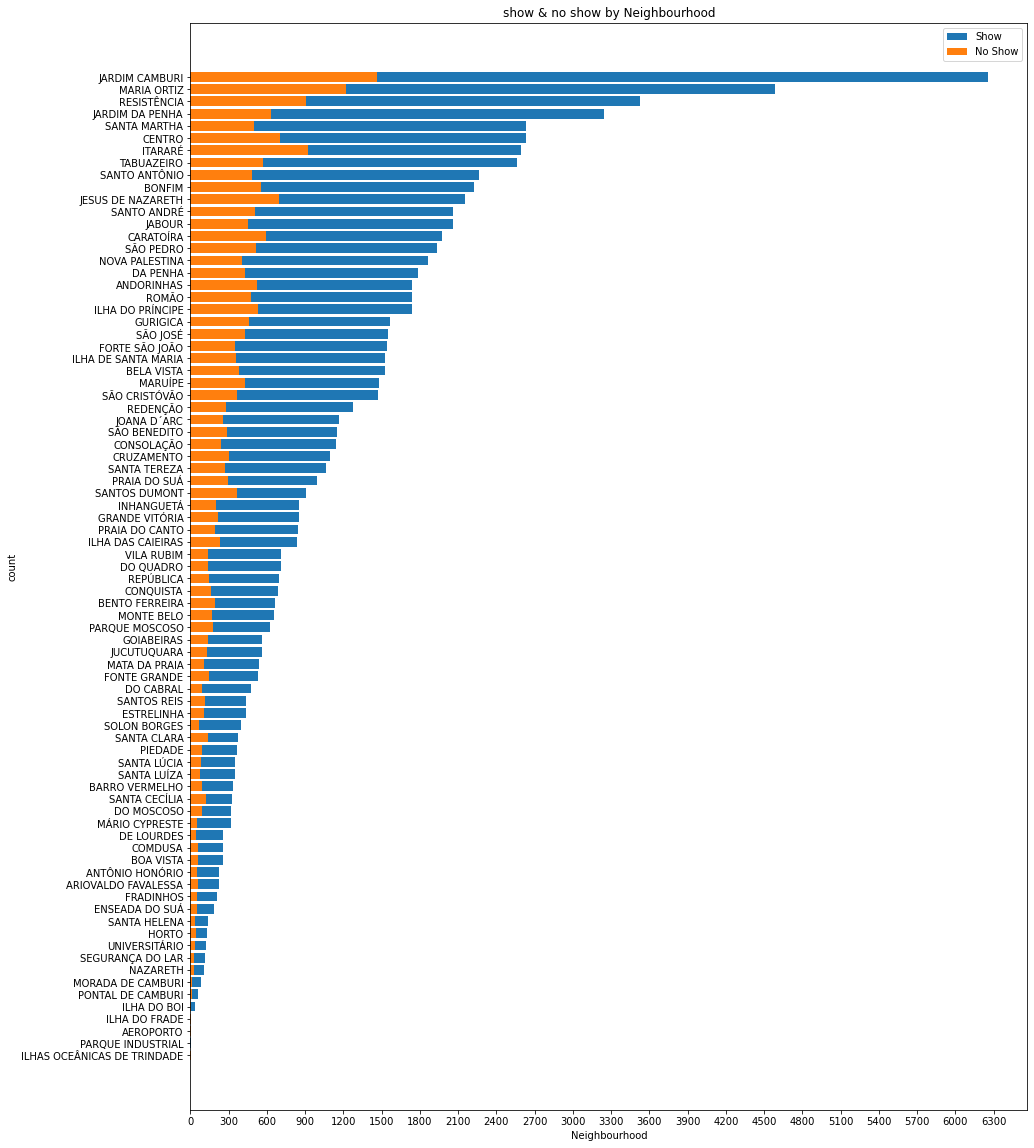

In [65]:


#values=date_show['Neighbourhood']
fig = plt.figure(figsize = (15,20))
plt.barh(Neighbourhood['Neighbourhood'],Neighbourhood['Show'])
plt.barh(Neighbourhood['Neighbourhood'],Neighbourhood['No-show_count'])

plt.title('show & no show by Neighbourhood')
plt.ylabel('count')
plt.xlabel('Neighbourhood')
plt.xticks(range(0,6500,300))


plt.legend(['Show','No Show']);


<a id='conclusions'></a>
## Conclusions


- **from no show appointment data  we can find the below:**
  - 34.9% for the appointments reserved in the same day & 95% of the patient show up in the same day means the patient are more likly to  show up if the resevation in the same day.
  - there is some age range small effect no show specaily with teenagers
  - there is no clear connection between (Gender,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism ,Handcap,SMS_received) and the no show.


  

Limatition :
- we dont have enugh information why on Sat 2016-05-14 there is on 39  appointments only
- its not clear why females rate who set an appointment  is 2 times number males rate
- patients with SMS recived has higher no show rate which is not normal , may me the sms was sent in wrong formate, or not clear that make the patents miss the appointmend , but we dont have enough data
- there is no clue why there huge gap in the appointment numbers between the areas.